# Watch for crime, especially theft in South and Central districts of San Francisco in summer

In [21]:
# load libraries and set initial data frame
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('notebook')
sns.set(style='ticks', font_scale=1.5)
df = pd.DataFrame.from_csv('sanfrancisco_incidents_summer_2014.csv')

## Crime per district
Lets consider only the ten most often crime events to not overload the visualizations

In [8]:
often = df['Category'].value_counts()[:10]
print often

LARCENY/THEFT      9466
OTHER OFFENSES     3567
NON-CRIMINAL       3023
ASSAULT            2882
VEHICLE THEFT      1966
WARRANTS           1782
DRUG/NARCOTIC      1345
SUSPICIOUS OCC     1300
MISSING PERSON     1266
SECONDARY CODES     442
Name: Category, dtype: int64


In [22]:
# group by category and district and count incidents
df2 = df[df['Category'].isin(often.index)]
df3 = df2.groupby(['Category', 'PdDistrict']).count().reset_index()

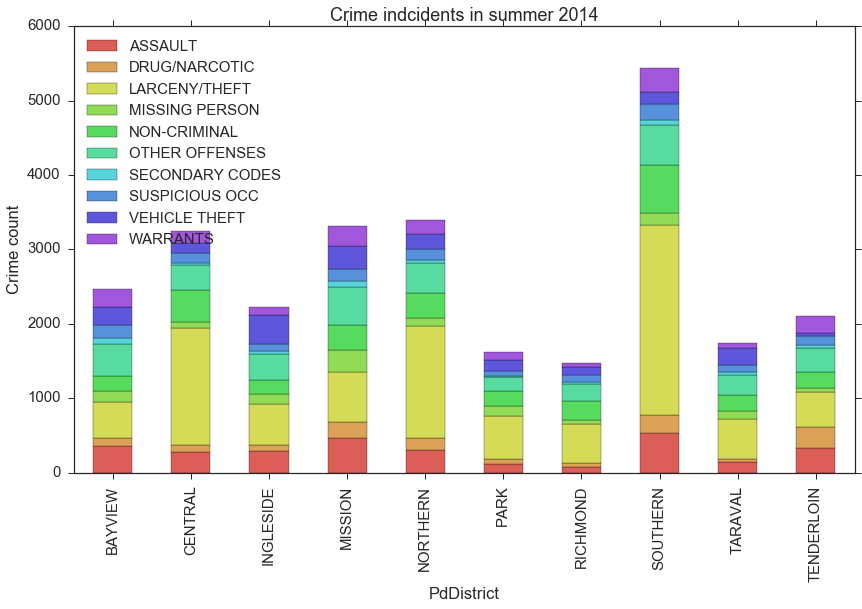

In [23]:
# Plot crime counts resolved by crime type per district
d_p2 = dict()
for category in often.index:
    tmpdf = df3[df3['Category'] == category]
    tmpdf = tmpdf.set_index('PdDistrict')
    d_p2[category] = tmpdf['Descript'] # Descript columns contains counts
df_p2 = pd.DataFrame(d_p2)
ax = df_p2.plot(kind='bar', stacked=True, figsize=(14,8), title='Crime indcidents in summer 2014', color=sns.color_palette("hls", 12))
ax.set_ylabel('Crime count')

The Southern district features most crimes, followed by Nothern, Mission, and Central. In all districts thefts are the most often occuring crime.

To better see which crime type is dominating in each district and how the crime ratios vary by district the following plot visualizes crime fractions.

In [24]:
# group by category and district and delete non-required columns
df3= df.groupby(['Category', 'PdDistrict']).count().reset_index().iloc[:,:3]
# rename the leftover column to counts to be more descriptive
df3.columns = [u'Category', u'PdDistrict', u'Counts']
# reshape data frame to get crime type as column
df3_reshaped = df3.pivot(index='PdDistrict', columns='Category', values='Counts')
df3_reshaped

Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,...,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,11,359,NaN,NaN,3,15,111,9,3,NaN,...,7,76,1,2,171,33,5,245,249,79
CENTRAL,1,277,NaN,NaN,1,6,91,24,2,NaN,...,1,29,NaN,NaN,131,52,2,146,162,16
INGLESIDE,5,292,1,NaN,4,7,81,9,NaN,1,...,6,45,1,2,93,9,NaN,382,110,28
MISSION,11,459,NaN,2,12,11,217,37,NaN,3,...,19,77,3,4,165,59,1,306,281,74
NORTHERN,9,297,NaN,1,1,8,174,8,1,1,...,2,42,NaN,1,149,36,2,202,193,48
PARK,1,118,NaN,NaN,5,4,63,9,NaN,NaN,...,5,12,1,1,60,6,1,150,109,11
RICHMOND,1,81,NaN,NaN,NaN,21,51,2,NaN,NaN,...,2,25,NaN,1,89,9,NaN,118,45,10
SOUTHERN,22,528,NaN,NaN,3,18,242,31,2,1,...,3,63,2,2,213,45,4,161,331,44
TARAVAL,2,147,NaN,2,NaN,8,31,5,1,1,...,16,36,NaN,1,104,10,1,222,65,14


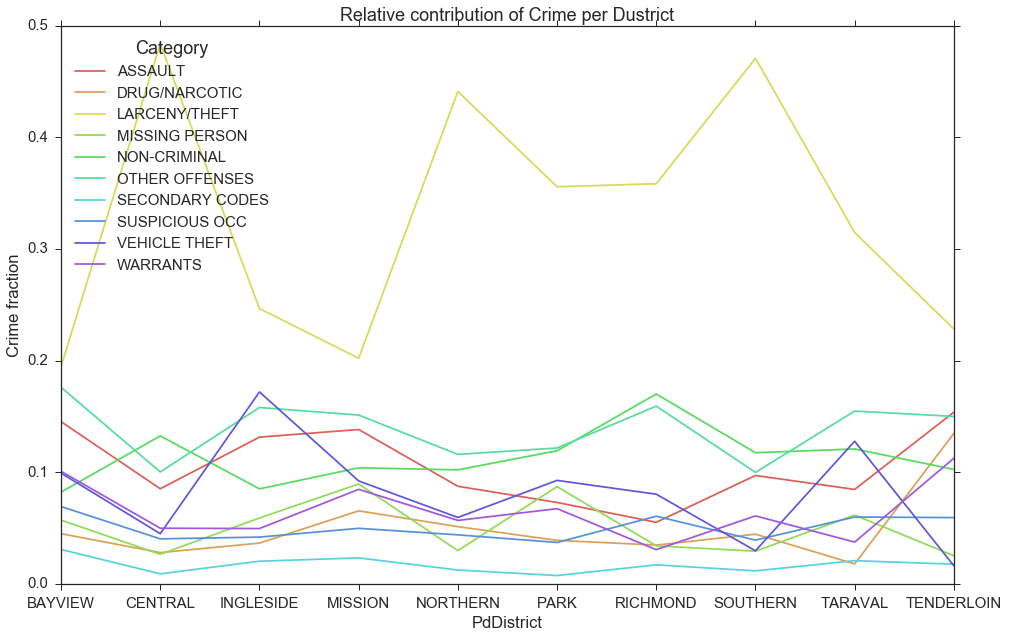

In [29]:
# only keep the ten most often crime categories
for column in df3_reshaped.columns:
    if column not in often.index:
        df3_reshaped = df3_reshaped.drop(column, 1)
# normalize per row
for index in df3_reshaped.index:
    df3_reshaped.loc[index] = df3_reshaped.loc[index].div(df3_reshaped.loc[index].sum())
# replace NAN by 0 to be able to plot
df3_reshaped = df3_reshaped.fillna(0)
# create plot
ax = df3_reshaped.plot(figsize=(16,10), title='Relative contribution of Crime per Dustrict', color=sns.color_palette("hls", 12))
ax.set_ylabel('Crime fraction')

We learn that thefts are the most prominent crime categorie as already expected from the bar plot before. Interestingly, the theft percentage is low in Bayview, Ingleside, Tenderloin, and Mission. In Ingleside vehicle theft is the second most often occruing crime category. In Tenderloin the fraction of assaults is the cesond highest. Watch your cars in Ingleside.

We now want to inspect theft and robbery only.

In [27]:
# extract theft and robbery
df4 = df[df['Category'].isin(['LARCENY/THEFT','ROBBERY'])]
# group by district and category and count
df5 = df4.groupby(['PdDistrict', 'Category']).count().reset_index().iloc[:, :3]
# rename to get a better description
df5.columns = [u'PdDistrict', u'Category', u'Count']
df5

,PdDistrict,Category,Count
0,BAYVIEW,LARCENY/THEFT,481
1,BAYVIEW,ROBBERY,36
2,CENTRAL,LARCENY/THEFT,1574
3,CENTRAL,ROBBERY,39
4,INGLESIDE,LARCENY/THEFT,548
5,INGLESIDE,ROBBERY,44
6,MISSION,LARCENY/THEFT,671
7,MISSION,ROBBERY,42
8,NORTHERN,LARCENY/THEFT,1499
9,NORTHERN,ROBBERY,30


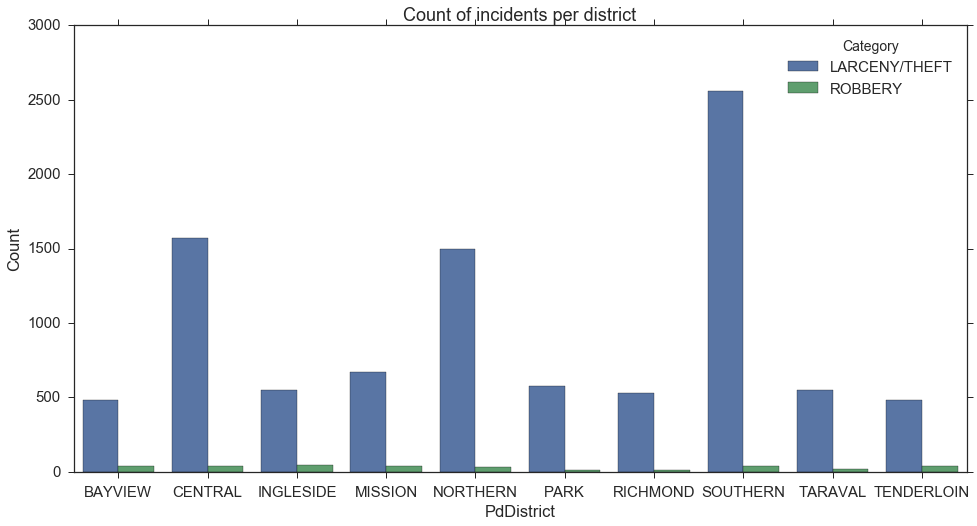

In [28]:
# Plot theft and robbery for the different districts
fig = plt.figure(dpi=300,figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot(x='PdDistrict', y='Count', hue='Category', data=df5)
plt.ylabel('Count')
#ax.set_yscale("log", nonposx='clip')
plt.title('Count of incidents per district')

Theft is by far more common than robbery. Southern is the most dangerous district. Central and Nothern are dangerous as well. Park, Richmond, and Taraval are the safest districts.